## Space Project (Part 1) - Our Planets!

This notebook will generate an image of the planets and the distance between each other based on real data<br>
It makes use of simple webscraping, pandas and image processing with Pillow
<br>Source: https://nssdc.gsfc.nasa.gov/planetary/factsheet/

### Imports

In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import Image as ImageDisplay

#### 1. Load Into Dataframe and Set Index

In [472]:
#Load in dataframe and set index
df = pd.read_html('https://nssdc.gsfc.nasa.gov/planetary/factsheet/', header = 0)[0]
df = df.set_index('Unnamed: 0')
df.drop(df.tail(1).index,inplace=True)
df.index.name = None

In [473]:
#Processing
df2 = df
df2['MOON'] = df['MOON'].str.replace('*', '', regex=True)
df2 = df.transpose()
df2['Distance from Sun (106 km)'] = df2['Distance from Sun (106 km)'].astype(float)
df2['Diameter (km)'] = df2['Diameter (km)'].astype(float)

#Scales a planet to 1000 times it's size for viewability
df2['Diameter (106 km) times 10^3'] = df2['Diameter (km)'] / 1000000 * 1000

In [474]:
#Show dataframe
df2

,Mass (1024kg),Diameter (km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (106 km),Perihelion (106 km),Aphelion (106 km),...,Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?,Diameter (106 km) times 10^3
MERCURY,0.330,4879.0,5429,3.7,4.3,1407.6,4222.6,57.900,46.0,69.8,...,47.4,7.0,0.206,0.034,167,0,0,No,Yes,4.879
VENUS,4.87,12104.0,5243,8.9,10.4,-5832.5,2802.0,108.200,107.5,108.9,...,35.0,3.4,0.007,177.4,464,92,0,No,No,12.104
EARTH,5.97,12756.0,5514,9.8,11.2,23.9,24.0,149.600,147.1,152.1,...,29.8,0.0,0.017,23.4,15,1,1,No,Yes,12.756
MOON,0.073,3475.0,3340,1.6,2.4,655.7,708.7,0.384,0.363,0.406,...,1.0,5.1,0.055,6.7,-20,0,0,No,No,3.475
MARS,0.642,6792.0,3934,3.7,5.0,24.6,24.7,228.000,206.7,249.3,...,24.1,1.8,0.094,25.2,-65,0.01,2,No,No,6.792
JUPITER,1898,142984.0,1326,23.1,59.5,9.9,9.9,778.500,740.6,816.4,...,13.1,1.3,0.049,3.1,-110,Unknown*,79,Yes,Yes,142.984
SATURN,568,120536.0,687,9.0,35.5,10.7,10.7,1432.000,1357.6,1506.5,...,9.7,2.5,0.052,26.7,-140,Unknown*,82,Yes,Yes,120.536
URANUS,86.8,51118.0,1270,8.7,21.3,-17.2,17.2,2867.000,2732.7,3001.4,...,6.8,0.8,0.047,97.8,-195,Unknown*,27,Yes,Yes,51.118
NEPTUNE,102,49528.0,1638,11.0,23.5,16.1,16.1,4515.000,4471.1,4558.9,...,5.4,1.8,0.010,28.3,-200,Unknown*,14,Yes,Yes,49.528
PLUTO,0.0130,2376.0,1850,0.7,1.3,-153.3,153.3,5906.400,4436.8,7375.9,...,4.7,17.2,0.244,122.5,-225,0.00001,5,No,Unknown,2.376


In [475]:
#Specify image width and heigth
width = int(df2['Distance from Sun (106 km)'].max()) + 100
heigth = int(df2['Diameter (106 km) times 10^3'].max() * 4)

#### 2. Create Image of Our Planets

In [476]:
#Specify the location of the planet images
planets = glob.glob('PIC\*.png')

In [477]:
#Create canvas
our_planets = Image.new("RGB", (width, heigth), "black")

In [478]:
#Add planets on canvas
for planet in planets:
    with open(planet, 'rb') as file:
        
        #Define variables
        planetname = planet.replace('PIC\\','').replace('.png','')
        distance_from_sun = df2.at[planetname.upper(), 'Distance from Sun (106 km)']
        size_proportion = df2.at[planetname.upper(), 'Diameter (106 km) times 10^3']       
        if planetname == 'saturn' or planetname == 'uranus':
            size_proportion *= 1.35 #Dealing with the ring's in the PNG
        number_of_moons = df2.at[planetname.upper(), 'Number of Moons']
        mean_temperature = df2.at[planetname.upper(), 'Mean Temperature (C)']
        
        #Image processing, the image has a padding before and after the last planet of 50 pixels
        img = Image.open(file)
        img.thumbnail((int(size_proportion), int(size_proportion)))
        left_padding = 50 + int((distance_from_sun))
        top_padding = int((heigth - img.width) / 2)
        resized_img = img
        
        #Text
        font = ImageFont.truetype("futur.ttf", 10)
        draw = ImageDraw.Draw(our_planets)
        if int(number_of_moons) > 1:
            draw.text((left_padding + (size_proportion / 2), top_padding + size_proportion + 8), f'{planetname}\n{mean_temperature} c\n{number_of_moons} moons', (255, 255, 255), font=font, anchor='ma', align='center')
        elif int(number_of_moons) == 1:
            draw.text((left_padding + (size_proportion / 2), top_padding + size_proportion + 8), f'{planetname}\n{mean_temperature} c\n{number_of_moons} moon', (255, 255, 255), font=font, anchor='ma', align='center')
        else:
            draw.text((left_padding + (size_proportion / 2), top_padding + size_proportion + 8), f'{planetname}\n{mean_temperature} c', (255, 255, 255), font=font, anchor='ma', align='center')
        
        #Description
        if planetname == 'earth':
            font_title = ImageFont.truetype("futur.ttf", 8)
            draw.text((width/2, int(heigth/100*96)), f'Planets are displayed thousand times their actual size to scale relative to each other\nsource: nasa', (255, 255, 255), anchor='ma', align='center', font=font_title)
        
        #Put planet on its rightful spot in its rightful size!
        our_planets.paste(resized_img, (left_padding, top_padding))

In [479]:
our_planets.save('our_planets.png')

#### 3. Result

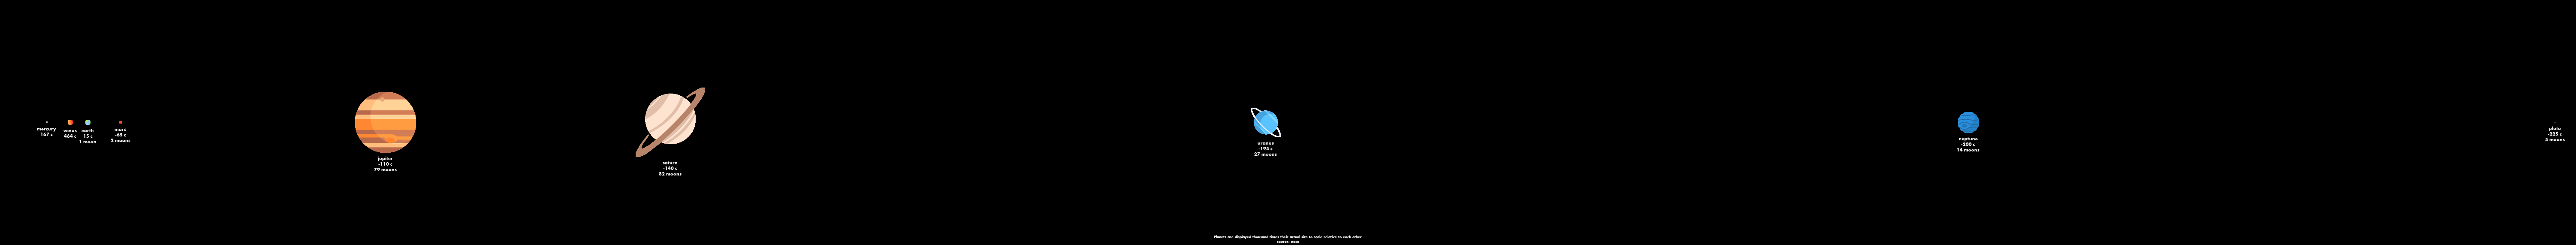

In [480]:
ImageDisplay(filename='our_planets.png') 